# Phishing Detection Project

## Import Libraries

In [5]:
# Import libraries for data manipulation, machine learning, and evaluation

import time  # For tracking training/testing durations
import joblib  # For saving/loading trained models
import pandas as pd  # Data handling with DataFrame
import numpy as np  # Numerical operations
import seaborn as sns  # Visualizations, especially heatmaps
import matplotlib.pyplot as plt  # For plotting graphs and charts

#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder  # features scaling and to encoding label or any non number value categorical
from sklearn.model_selection import train_test_split  # split dataset 
from pyswarm import pso


#models
from sklearn.linear_model import LogisticRegression  # logistic regression ؤclassifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from tensorflow.keras.layers import Conv1D, MaxPooling1D   # CNN 
from tensorflow.keras.layers import LSTM, GRU, Flatten  # RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Evaluations
from sklearn.metrics import (
    accuracy_score,  # Evaluate model accuracy
    balanced_accuracy_score,  # Evaluate balanced accuracy
    roc_auc_score,  # Compute AUC for ROC curve
    roc_curve,  # Plot ROC curve
    f1_score,  # Calculate F1 score
    recall_score,  # Measure recall (True Positive rate)
    precision_score,  # Measure precision (True Positive / Predicted Positive)
    log_loss,  # Logarithmic loss
    ConfusionMatrixDisplay,  # Confusion martrix ploting
    brier_score_loss,  # Brier Loss
    matthews_corrcoef,  #Matthew's correletion coeffecient
    confusion_matrix,  # Create confusion matrix for evaluation
    precision_recall_curve,  # Precision recall curve
    average_precision_score  # AP score
)

## Load Dataset

In [6]:
# Load the phishing dataset from a CSV file
data = pd.read_csv(r'datasets\dataset_phishing.csv')

## Recognize Dataset

In [7]:
# Print the number of samples in the dataset
print("train data length", len(data))

# Print the distribution of the 'status' column
print(data['status'].value_counts())

train data length 11430
status
legitimate    5715
phishing      5715
Name: count, dtype: int64


<BarContainer object of 2 artists>

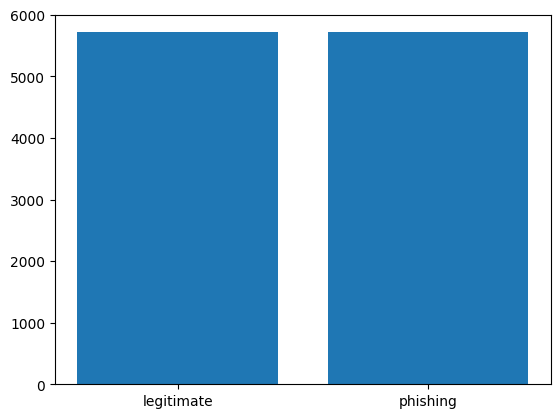

In [8]:
# to get the two classes and thier counts
classes = np.unique(data['status'], return_counts=True) 

# classes[0] has the lable (legitimate, phishing), Classes[1] has the count of label
plt.bar(classes[0], classes[1])  

In [9]:
# Display basic information about the dataset (e.g., column types, non-null counts)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [10]:
# Display summary statistics for the dataset (transposed for better readability)
print(data.describe().T)

                   count           mean           std   min     25%     50%  \
length_url       11430.0      61.126684  5.529732e+01  12.0   33.00    47.0   
length_hostname  11430.0      21.090289  1.077717e+01   4.0   15.00    19.0   
ip               11430.0       0.150569  3.576436e-01   0.0    0.00     0.0   
nb_dots          11430.0       2.480752  1.369686e+00   1.0    2.00     2.0   
nb_hyphens       11430.0       0.997550  2.087087e+00   0.0    0.00     0.0   
...                  ...            ...           ...   ...     ...     ...   
domain_age       11430.0    4062.543745  3.107785e+03 -12.0  972.25  3993.0   
web_traffic      11430.0  856756.643307  1.995606e+06   0.0    0.00  1651.0   
dns_record       11430.0       0.020122  1.404254e-01   0.0    0.00     0.0   
google_index     11430.0       0.533946  4.988682e-01   0.0    0.00     1.0   
page_rank        11430.0       3.185739  2.536955e+00   0.0    1.00     3.0   

                       75%         max  
length_url

## Pre-processing Dataset

## Encoding

In [11]:
# Apply label encoding to the 'url' and 'status' columns to convert categorical values to numerical labels  [legitimate, phishing] --> [0,1]
label_encoder = LabelEncoder()

# Encode 'url' column
data['url_encoded'] = label_encoder.fit_transform(data['url'])  

# Encode 'status' column
data['status_encoded'] = label_encoder.fit_transform(data['status'])  

## Feature Selection Manually

In [12]:
# Drop original 'url' and 'status' columns from the dataset
data = data.drop(['url', 'status'], axis=1)

# Separate features (x) and target variable (y)
# Features excluding the target column
x = data.drop('status_encoded', axis=1)

# Target or label
y = data['status_encoded'] 

## Correlation Analysis

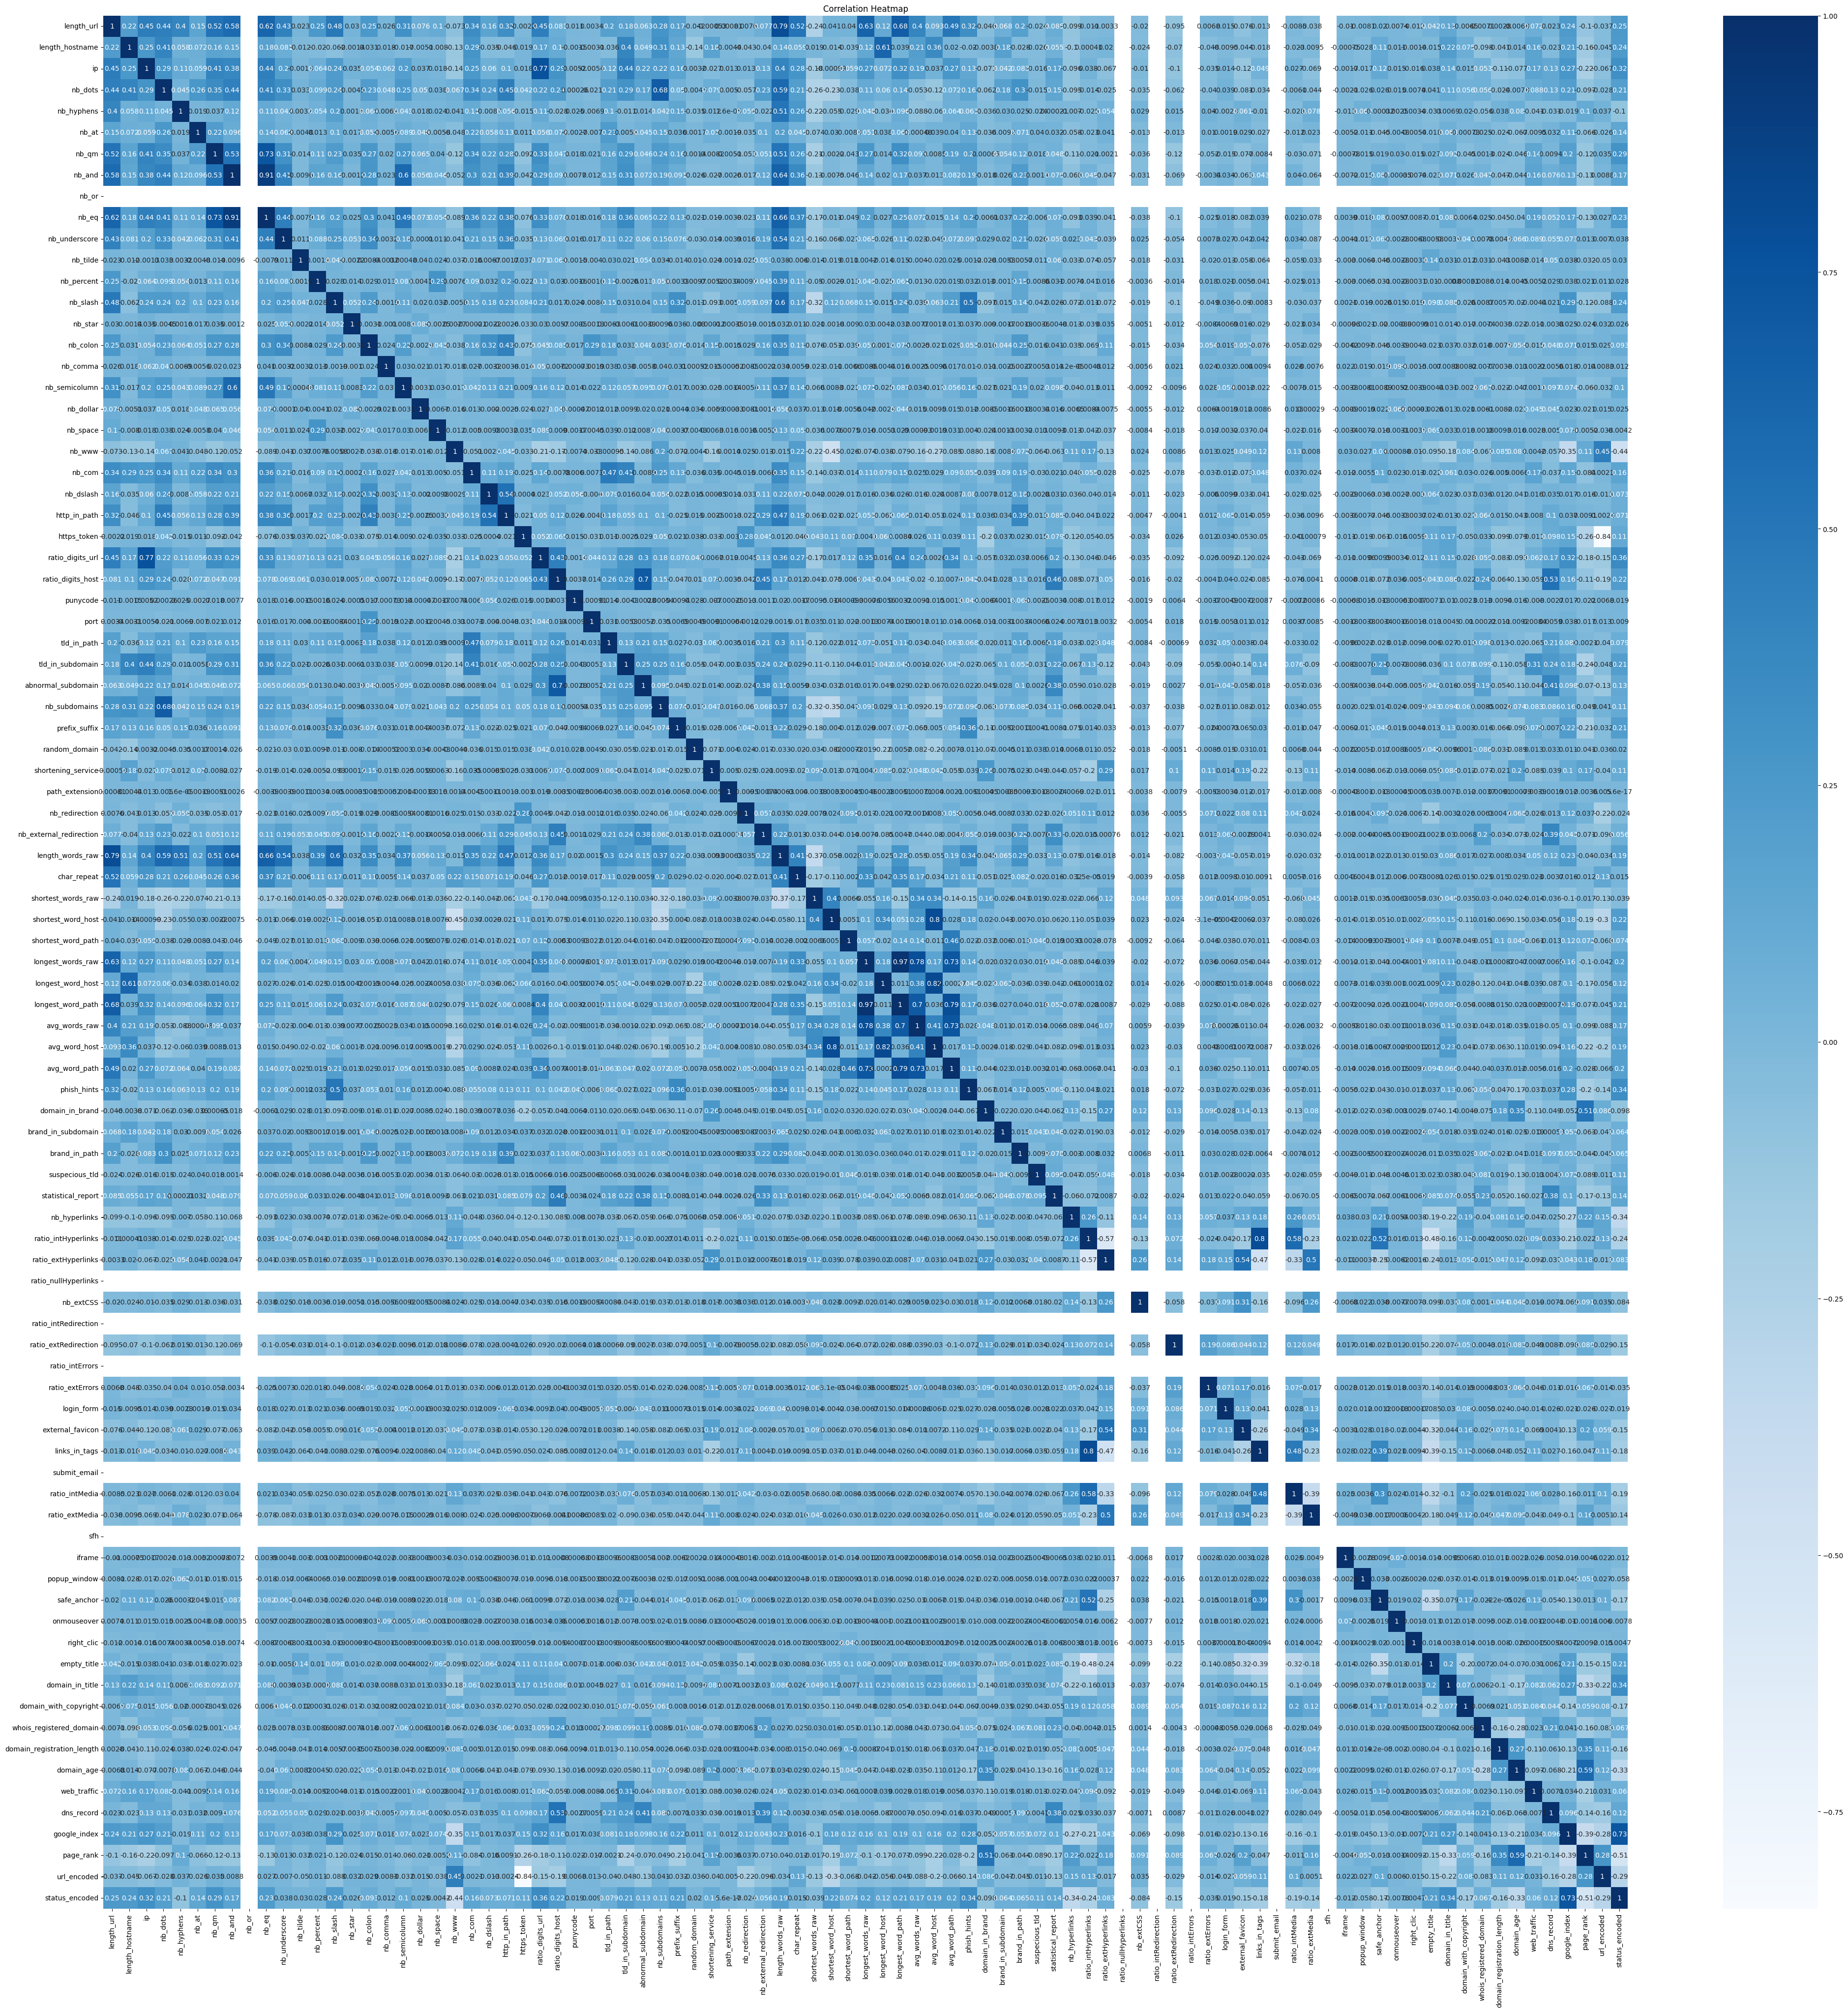

In [13]:
# Compute correlation matrix and plot a heatmap to visualize feature relationships
corr = data.corr()

# Set the figure size
fig,ax = plt.subplots(figsize=(50, 50))  

# Plot heatmap with annotations
sns.heatmap(corr, cmap='Blues', annot=True)  

# Title for the heatmap
plt.title('Correlation Heatmap')

 # Display the plot  
plt.show() 

In [14]:
# Separate features (x) and target variable (y)
# Features excluding the target column
x = data.drop(columns=['nb_eq','longest_word_path','avg_word_host','status_encoded'])

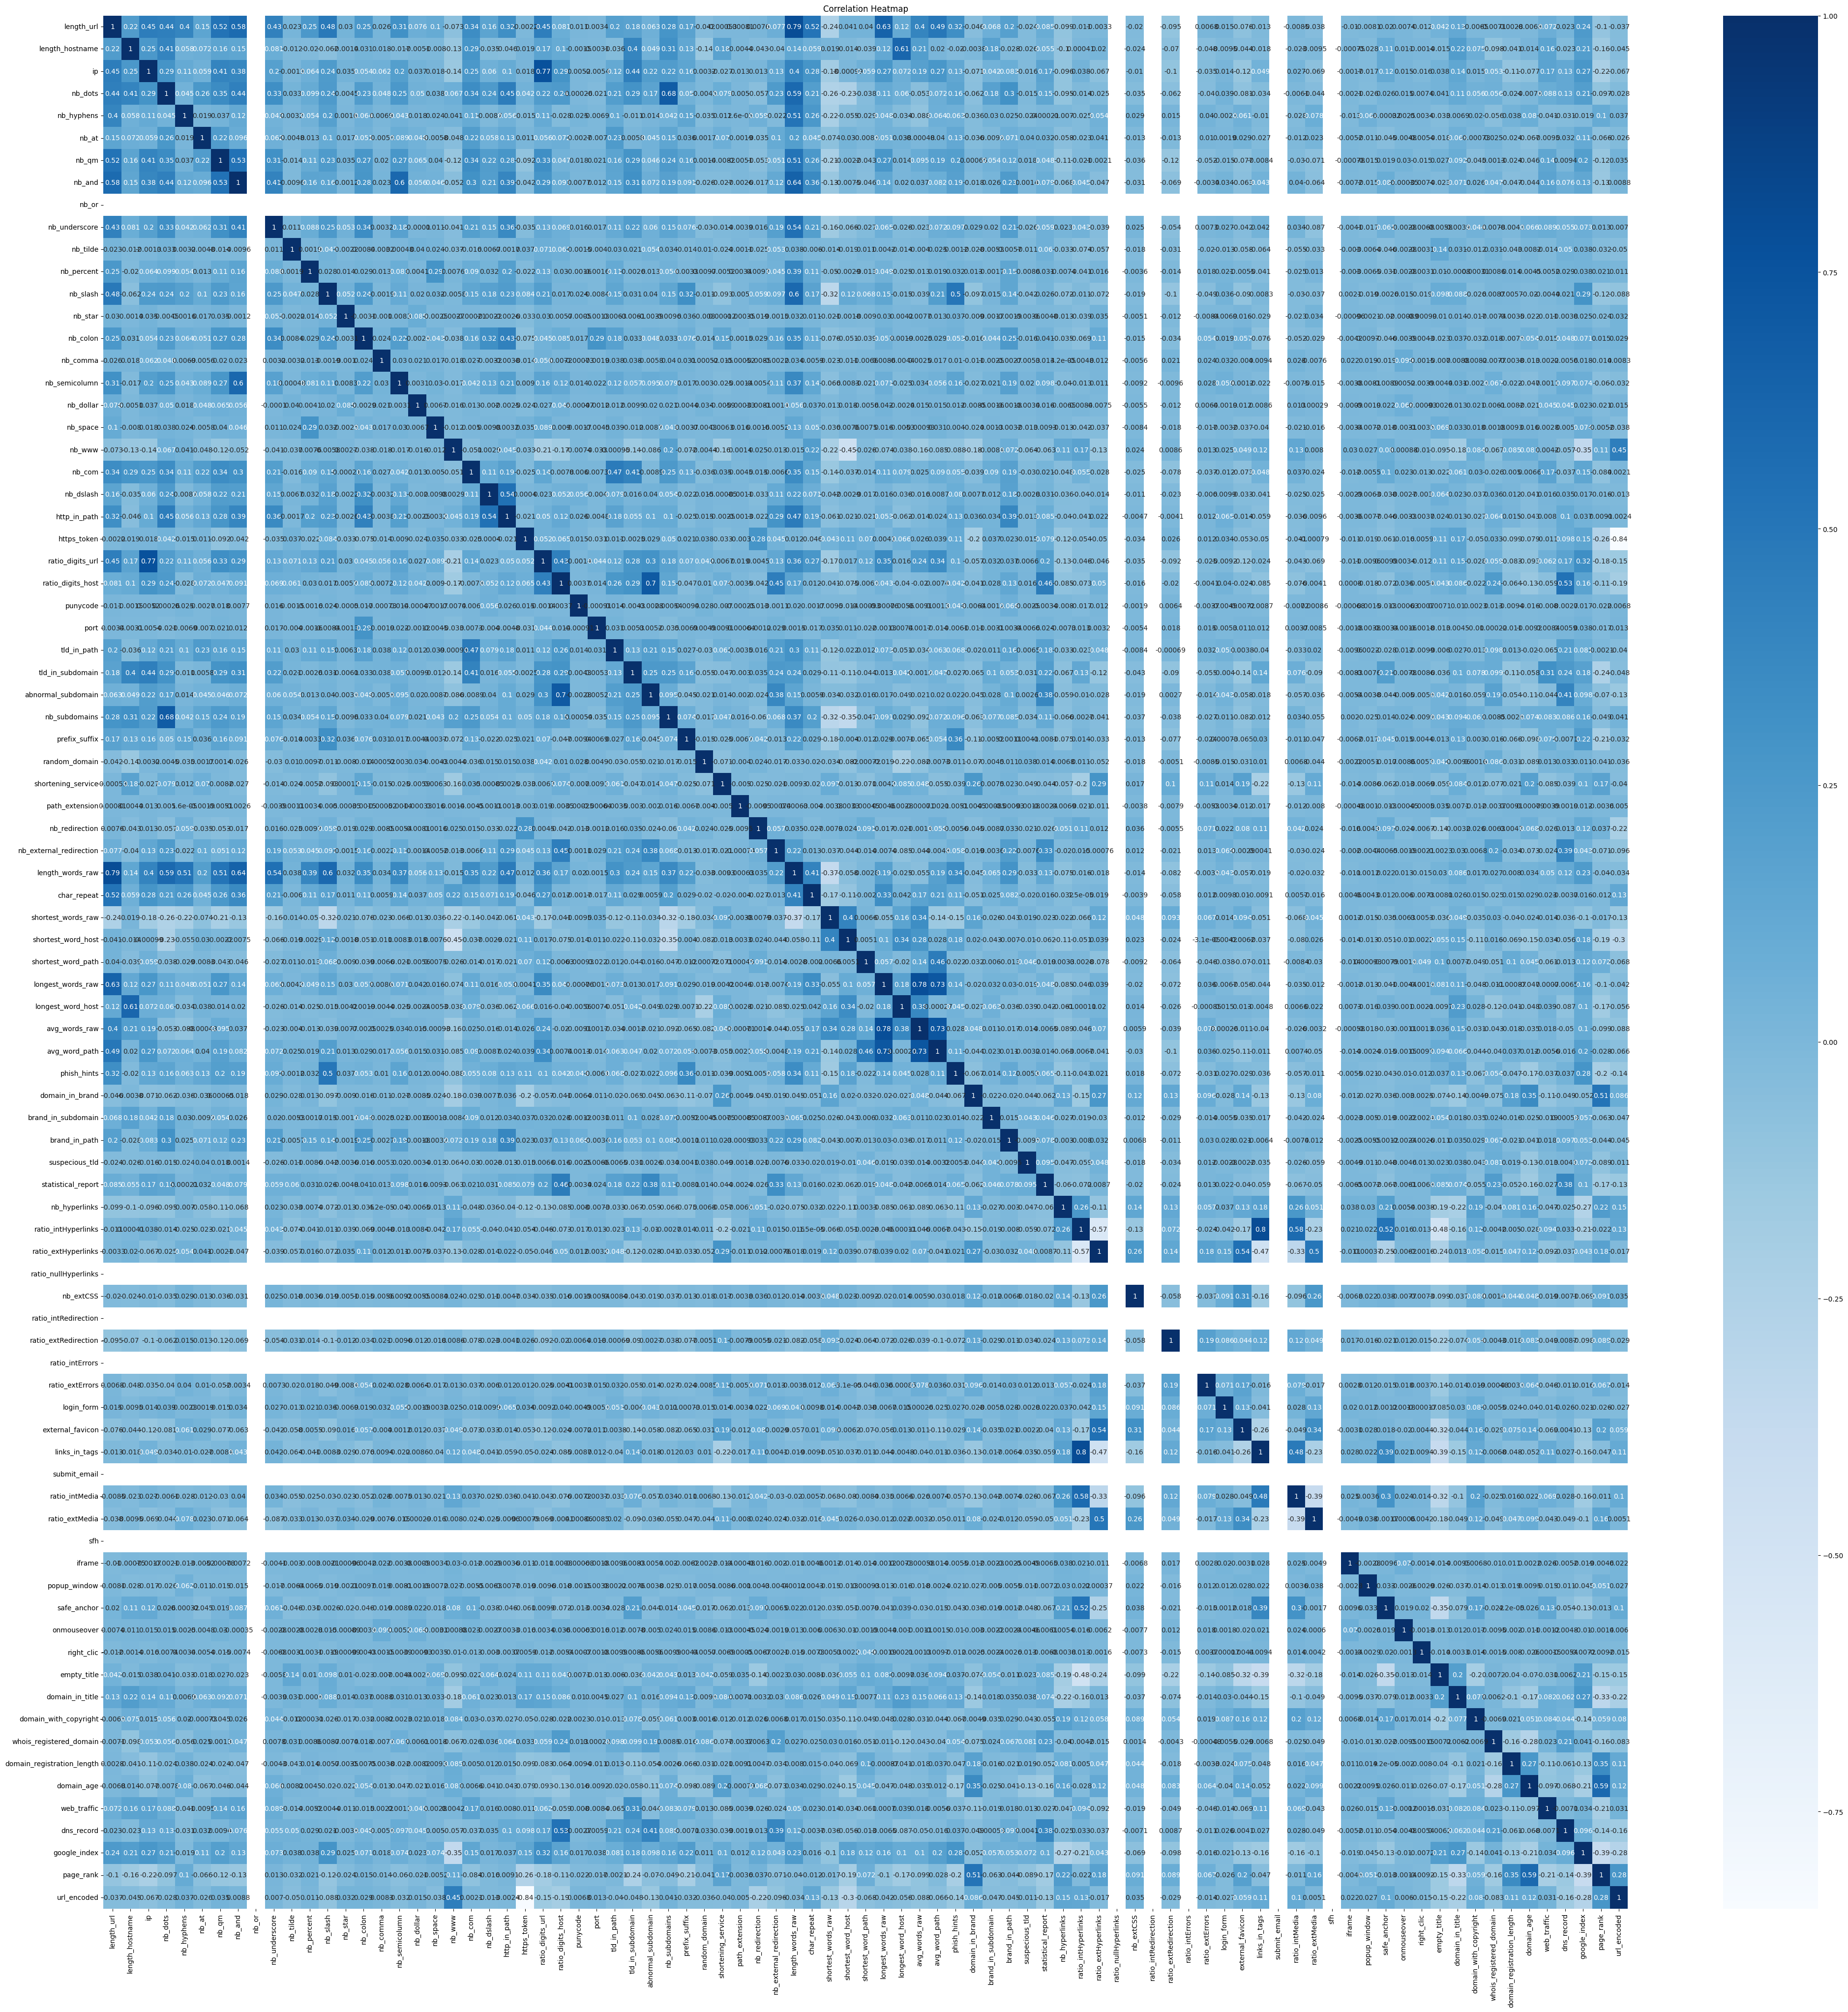

In [15]:
# Compute correlation matrix and plot a heatmap to visualize feature relationships
corr = x.corr()

# Set the figure size
fig,ax = plt.subplots(figsize=(50, 50))  

# Plot heatmap with annotations
sns.heatmap(corr, cmap='Blues', annot=True)  

# Title for the heatmap
plt.title('Correlation Heatmap')

 # Display the plot  
plt.show() 

In [16]:
# Check for null values in each column
print("Null values in each column:")
print(data.isnull().any())

# Check if the dataset contains any null values
print(f"Does the dataset have any null values? {data.isnull().any().any().any()}")

Null values in each column:
length_url         False
length_hostname    False
ip                 False
nb_dots            False
nb_hyphens         False
                   ...  
dns_record         False
google_index       False
page_rank          False
url_encoded        False
status_encoded     False
Length: 89, dtype: bool
Does the dataset have any null values? False


## Scale Features
<img src="Feature Scaling Formula.png">

In [17]:
# Standardize the features by scaling them to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

# Scale the features (x) using StandardScaler
X_scaled = scaler.fit_transform(x)  

## Splitting Data

In [18]:
# Split the dataset into training and testing sets (80% train, 20% test) with random_state to get random data examples not sequential (مش ورا بعض يعني ياخد من فوق شويه ومن تحت شويه)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Feature Selection using PSO

In [19]:

def fitness_function(features):
    selected_features = [i for i in range(len(features)) if features[i] == 1]
    if len(selected_features) == 0:
        return 1e10  # Penalize if no features are selected
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    
    # Train Logistic Regression model
    model = LogisticRegression(max_iter=100)
    # model = LogisticRegression(max_iter=100)
    model.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_selected)
    
    # Calculate accuracy
    return -accuracy_score(y_test, y_pred)  # PSO minimizes the fitness function, so return negative accuracy

# Apply PSO for feature selection
lb = [0] * X_train.shape[1]  # Lower bound for each feature (0: not selected)
ub = [1] * X_train.shape[1]  # Upper bound for each feature (1: selected)

best_features, _ = pso(fitness_function, lb, ub, swarmsize=20, maxiter=100)

# Get the selected features
selected_features = [i for i in range(len(best_features)) if best_features[i] == 1]
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

Stopping search: maximum iterations reached --> 100


In [20]:
print(f'Trainig data shape : {X_train.shape}, Trainig selected data shape : {X_train_selected.shape}')
print(f'testing data shape : {X_test.shape}, testing selected data shape : {X_test_selected.shape}')
print(selected_features)

Trainig data shape : (9144, 85), Trainig selected data shape : (9144, 18)
testing data shape : (2286, 85), testing selected data shape : (2286, 18)
[4, 6, 16, 19, 21, 23, 31, 35, 36, 43, 45, 49, 51, 58, 63, 67, 82, 83]


## Train Logistic Regression Model

In [21]:
# Initialize the Logistic Regression model and train it on the training data
lr_model = LogisticRegression()

# Measure the training time for the Logistic Regression model
lr_StartTime = time.time()  # Start time for training
lr_model.fit(X_train_selected, y_train)  # Train the model
lr_TrainingTime = time.time() - lr_StartTime  # Calculate the elapsed training time

## Train SVM Model

In [22]:
# Initialize the Support Vector Machine (SVM) model with probability estimates
# svm_model = SVC(probability=True)
svm_model = SVC(C=1, random_state=42, probability=True)

# Measure the training time for the SVM model
svm_StartTime = time.time()  # Start time for training
svm_model.fit(X_train_selected, y_train)  # Train the model
svm_TrainingTime = time.time() - svm_StartTime  # Calculate the elapsed training time


## Train KNN Model

In [23]:
# Initialize the K-Nearest Neighbors (KNN) model
# 95 neighbors as training data examples is 9144 and k should be square root of examples
knn_model = KNeighborsClassifier(n_neighbors=95)

# Measure the training time for the KNN model
knn_StartTime = time.time()  # Start time for training
knn_model.fit(X_train_selected, y_train)  # Train the model
KNN_TrainingTime = time.time() - knn_StartTime  # Calculate the elapsed training time


## Train Random Forest Model

In [24]:
# Initialize the Random Forest classifier
# n_estimators: Number of trees in the forest, max_depth: Maximum depth of each tree to prevent overfitting
rf_model = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)

# Measure the training time for the Random Forest model
rf_StartTime = time.time()  # Start time for training
rf_model.fit(X_train_selected, y_train)  # Train the model
rf_TrainingTime = time.time() - rf_StartTime  # Calculate the elapsed training time


## Train Decision Tree Model

In [25]:
# Initialize the Decision Tree classifier
# entropy mean id3, max_depth: Maximum depth of tree to prevent overfitting
dt_model = DecisionTreeClassifier(criterion ="entropy", max_depth=10, random_state=42)

# Measure the training time for the Decision Tree model
dt_StartTime = time.time()  # Start time for training
dt_model.fit(X_train_selected, y_train)  # Train the model
dt_TrainingTime = time.time() - dt_StartTime  # Calculate the elapsed training time


## Train Neural Network Model

In [26]:
# Build the NN model
nn_model = Sequential([
    # input layer with 88 feature (X_train.shape[1]) and 128 perceptron
    Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],)),
    # hidden layer with 64 perceptron
    Dense(64, activation='relu'),
    # hidden layer with 32 perceptron
    Dense(32, activation='relu'),
    # output layer with one perceptron 
    Dense(1, activation='sigmoid')
])

# Compile the model
# using optimization technique adam to optimize and adjust learning rate and loss function is binary cross entropy 
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Measure the training time for the NN model
nn_StartTime = time.time()  # Start time for training
# total training dataset is 9144 take 20% for validation (1829) and 80% for training (7315) 
# with 32 batch so every batch will be 229 sample and the model will loop on total dataset for 20 epochs
nn_model.fit(X_train_selected, y_train, epochs=20, batch_size=32, validation_split=0.2)
nn_TrainingTime = time.time() - nn_StartTime  # Calculate the elapsed training time


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8708 - loss: 0.3514 - val_accuracy: 0.9273 - val_loss: 0.1862
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - loss: 0.1920 - val_accuracy: 0.9317 - val_loss: 0.1807
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9231 - loss: 0.1919 - val_accuracy: 0.9284 - val_loss: 0.1771
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9339 - loss: 0.1782 - val_accuracy: 0.9333 - val_loss: 0.1664
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9344 - loss: 0.1674 - val_accuracy: 0.9306 - val_loss: 0.1667
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9404 - loss: 0.1548 - val_accuracy: 0.9306 - val_loss: 0.1769
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9349 - loss: 0.1622 - val_accuracy: 0.9338 - val_loss: 0.1597
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9483 - loss: 0.1407 - val_accuracy: 0.

In [27]:
# display model parameters (weights and bias)
nn_model.summary()

#number of parameters = ( number of inputs * number of perceptron ) + number of perceptron
#                        (88 (features)    *  (128 first layer perceptron)) + 128 = 11392

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,405 (150.02 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,604 (100.02 KB)

## Train Recurrent Neural Network Model

In [28]:
# Build the RNN model
rnn_model = Sequential([
    # (return_sequences = False) it outputs the final hidden state as a single vector for the next layer
    LSTM(128, return_sequences=False, input_shape=(X_train_selected.shape[1], 1)),
    # hidden layer with 64 perceptron
    Dense(64, activation='relu'),
    # hidden layer with 32 perceptron
    Dense(32, activation='relu'),
    # output layer with one perceptron 
    Dense(1, activation='sigmoid')
])

# Compile the model
# using optimization technique adam to optimize and adjust learning rate and loss function is binary cross entropy 
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Measure the training time for the RNN model
rnn_StartTime = time.time()  # Start time for training
# total training dataset is 9144 take 20% for validation (1829) and 80% for training (7315) 
# with 32 batch so every batch will be 229 sample and the model will loop on total dataset for 20 epochs
rnn_model.fit(X_train_selected, y_train, epochs=20, batch_size=32, validation_split=0.2)
rnn_TrainingTime = time.time() - rnn_StartTime  # Calculate the elapsed training time


Epoch 1/20


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


229/229 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7479 - loss: 0.4977 - val_accuracy: 0.9021 - val_loss: 0.2790
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8910 - loss: 0.2973 - val_accuracy: 0.8983 - val_loss: 0.2683
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8911 - loss: 0.2769 - val_accuracy: 0.9016 - val_loss: 0.2516
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8930 - loss: 0.2622 - val_accuracy: 0.9142 - val_loss: 0.2403
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8990 - loss: 0.2527 - val_accuracy: 0.9076 - val_loss: 0.2565
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9058 - loss: 0.2427 - val_accuracy: 0.9049 - val_loss: 0.2453
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9033 - loss: 0.2417 - val_accuracy: 0.9180 - val_loss: 0.2189
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9109 - loss: 0.2251 - val_accuracy: 0.904

In [29]:
# display model parameters (weights and bias)
rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,789 (901.52 KB)

 Trainable params: 76,929 (300.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 153,860 (601.02 KB)

## Train Convolution Neural Network Model

In [30]:
# Build the CNN model
cnn_model = Sequential([
    # use 32 kernel or filter and kernel size is 3 will look at 3 adjacent values at a time
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_selected.shape[1], 1)),
    # get the max between window consist of 2 values 
    MaxPooling1D(pool_size=2),
    # to make them in a one vector to input to Neural network
    Flatten(),
    # hidden layer with 64 perceptron
    Dense(64, activation='relu'),
    # hidden layer with 32 perceptron
    Dense(32, activation='relu'),
    # output layer with one perceptron
    Dense(1, activation='sigmoid')
])

# Compile the model
# using optimization technique adam to optimize and adjust learning rate and loss function is binary cross entropy 
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Measure the training time for the CNN model
cnn_StartTime = time.time()  # Start time for training
# total training dataset is 9144 take 20% for validation (1829) and 80% for training (7315) 
# with 32 batch so every batch will be 229 sample and the model will loop on total dataset for 20 epochs
cnn_model.fit(X_train_selected, y_train, epochs=20, batch_size=32, validation_split=0.2)
cnn_TrainingTime = time.time() - cnn_StartTime  # Calculate the elapsed training time


Epoch 1/20


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7950 - loss: 0.4641 - val_accuracy: 0.9098 - val_loss: 0.2331
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9047 - loss: 0.2638 - val_accuracy: 0.9207 - val_loss: 0.2060
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9135 - loss: 0.2168 - val_accuracy: 0.9185 - val_loss: 0.2062
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9214 - loss: 0.2055 - val_accuracy: 0.9300 - val_loss: 0.1852
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9268 - loss: 0.1927 - val_accuracy: 0.9224 - val_loss: 0.2147
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9280 - loss: 0.1899 - val_accuracy: 0.9256 - val_loss: 0.1908
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9299 - loss: 0.1888 - val_accuracy: 0.9289 - val_loss: 0.1811
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9302 - loss: 0.1822 - val_accuracy: 0.9328 - val_

In [31]:
# display model parameters (weights and bias)
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 16, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,069 (219.02 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,380 (146.02 KB)

## Save Model

In [32]:
# Save the trained models to disk using joblib for later use
joblib.dump(lr_model, 'phishing_model_LogisticRegression.pkl')  # Save Logistic Regression model
joblib.dump(svm_model, 'phishing_model_SVM.pkl')  # Save SVM model
joblib.dump(knn_model, 'phishing_model_KNN.pkl')  # Save KNN model
joblib.dump(rf_model, 'phishing_model_RandomForest.pkl')  # Save Random Forest model
joblib.dump(dt_model, 'phishing_model_DecisionTree.pkl')  # Save Decision Tree model
joblib.dump(nn_model, 'phishing_model_NN.pkl')  # Save NN model
joblib.dump(rnn_model, 'phishing_model_RNN.pkl')  # Save RNN model
joblib.dump(cnn_model, 'phishing_model_CNN.pkl')  # Save CNN model

['phishing_model_CNN.pkl']

## Evaluate Model

In [33]:
# Measure the testing time and make predictions for each model

# Logistic Regression model predictions and testing time
lr_StartTimes = time.time()  
y_pred_lr = lr_model.predict(X_test_selected)  # Predict using Logistic Regression                     it return 0 or 1
lr_TestingTime = time.time() - lr_StartTimes  # Calculate testing time

# Decision Tree model predictions and testing time
dt_StartTimes = time.time()  
y_pred_dt = dt_model.predict(X_test_selected)  # Predict using Decision Tree                           it return 0 or 1
dt_TestingTime = time.time() - dt_StartTimes  # Calculate testing time

# Random Forest model predictions and testing time
rf_StartTimes = time.time()  
y_pred_rf = rf_model.predict(X_test_selected)  # Predict using Random Forest                           it return 0 or 1
rf_TestingTime = time.time() - rf_StartTimes  # Calculate testing time

# SVM model predictions and testing time
svm_StartTimes = time.time()  
y_pred_svm = svm_model.predict(X_test_selected)  # Predict using SVM                                   it return 0 or 1
svm_TestingTime = time.time() - svm_StartTimes  # Calculate testing time

# KNN model predictions and testing time
knn_StartTimes = time.time()  
y_pred_knn = knn_model.predict(X_test_selected)  # Predict using KNN                                   it return 0 or 1
knn_TestingTime = time.time() - knn_StartTimes  # Calculate testing time

# NN model predictions and testing time
nn_StartTimes = time.time()  
y_pred_nn = nn_model.predict(X_test_selected)  # Predict using NN                                      it return value between 0 and 1       2D array
nn_TestingTime = time.time() - nn_StartTimes  # Calculate testing time

# RNN model predictions and testing time
rnn_StartTimes = time.time()  
y_pred_rnn = rnn_model.predict(X_test_selected)  # Predict using RNN                                   it return value between 0 and 1       2D array
rnn_TestingTime = time.time() - rnn_StartTimes  # Calculate testing time

# CNN model predictions and testing time
cnn_StartTimes = time.time()  
y_pred_cnn = cnn_model.predict(X_test_selected)  # Predict using CNN                                   it return value between 0 and 1       2D array
cnn_TestingTime = time.time() - cnn_StartTimes  # Calculate testing time

# Get prediction probabilities for each model
y_prob_lr = lr_model.predict_proba(X_test_selected)[:, 1]  # Probabilities for Logistic Regression     it return value between 0 and 1
y_prob_dt = dt_model.predict_proba(X_test_selected)[:, 1]  # Probabilities for Decision Tree           it return value between 0 and 1
y_prob_rf = rf_model.predict_proba(X_test_selected)[:, 1]  # Probabilities for Random Forest           it return value between 0 and 1
y_prob_svm = svm_model.predict_proba(X_test_selected)[:, 1]  # Probabilities for SVM                   it return value between 0 and 1
y_prob_knn = knn_model.predict_proba(X_test_selected)[:, 1]  # Probabilities for KNN                   it return value between 0 and 1
y_prob_nn = nn_model.predict(X_test_selected)[:,0]  # Probabilities for NN                             it return value between 0 and 1       1D array
y_prob_cnn = cnn_model.predict(X_test_selected)[:,0]  # Probabilities for CNN                          it return value between 0 and 1       1D array
y_prob_rnn = rnn_model.predict(X_test_selected)[:,0]  # Probabilities for RNN                          it return value between 0 and 1       1D array

# Convert probabilities to binary class labels for nn and rnn and cnn
y_pred_nn_binary = np.where(y_pred_nn >= 0.5, 1, 0)                                         # it return 0 or 1
y_pred_rnn_binary = np.where(y_pred_rnn >= 0.5, 1, 0)                                       # it return 0 or 1
y_pred_cnn_binary = np.where(y_pred_cnn >= 0.5, 1, 0)                                       # it return 0 or 1

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


## Define Evaluation Matrix

In [34]:
# Define evaluation metrics and models for comparison
evaluationMatrix = ["Accuracy", "Balanced Accuracy", "AUC", "F1-Score", "Recall", "Precision", "MCC", "Log Loss", "Youden Index", "Brier Loss", "AP", "Training Time", "Testing Time"]
models = ["logisticRegression", "Decision Tree", "RandomForest", "SVM", "KNN","NN","CNN","RNN"]

# Create an empty DataFrame to store evaluation results for each model
df = pd.DataFrame(index=models, columns=evaluationMatrix)

## Youden’s Index (J-statistic)

In [35]:
def Youden(y_true, y_pred):
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Calculate Youden's Index
    youden_index = sensitivity + specificity - 1
    
    return youden_index


## Evaluations Results

In [36]:
# Initialize a dictionary to store results
results = {}

# ------------------- Logistic Regression -------------------
# Store Logistic Regression results
results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_lr),
    "F1-Score": f1_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "AUC": roc_auc_score(y_test, y_prob_lr),
    "MCC": matthews_corrcoef(y_test, y_pred_lr),
    "Log Loss" : log_loss(y_test, y_prob_lr),
    "Youden Index" : Youden(y_test, y_pred_lr),
    "Brier Loss" : brier_score_loss(y_test, y_prob_lr),
    "AP" : average_precision_score(y_test, y_prob_lr)
}

# ------------------- Decision Tree -------------------
# Store SVM results
results["SVM"] = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_svm),
    "F1-Score": f1_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm),
    "AUC": roc_auc_score(y_test, y_prob_svm),
    "MCC": matthews_corrcoef(y_test, y_pred_svm),
    "Log Loss" : log_loss(y_test, y_prob_svm),
    "Youden Index" : Youden(y_test, y_pred_svm),
    "Brier Loss" : brier_score_loss(y_test, y_prob_svm),
    "AP" : average_precision_score(y_test, y_prob_svm)

}

# ------------------- KNN Forest -------------------
# Store KNN results
results["KNN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_knn),
    "F1-Score": f1_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "AUC": roc_auc_score(y_test, y_prob_knn),
    "MCC": matthews_corrcoef(y_test, y_pred_knn),
    "Log Loss" : log_loss(y_test, y_prob_knn),
    "Youden Index" : Youden(y_test, y_pred_knn),
    "Brier Loss" : brier_score_loss(y_test, y_prob_knn),
    "AP" : average_precision_score(y_test, y_prob_knn)

}

# ------------------- Random Forest -------------------
# Store Random Forest results
results["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "AUC": roc_auc_score(y_test, y_prob_rf),
    "MCC": matthews_corrcoef(y_test, y_pred_rf),
    "Log Loss" : log_loss(y_test, y_prob_rf),
    "Youden Index" : Youden(y_test, y_pred_rf),
    "Brier Loss" : brier_score_loss(y_test, y_prob_rf),
    "AP" : average_precision_score(y_test, y_prob_rf)

}

# ------------------- Decision Tree -------------------
# Store Decision Tree results
results["Decision Tree"] = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_dt),
    "F1-Score": f1_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "AUC": roc_auc_score(y_test, y_prob_dt),
    "MCC": matthews_corrcoef(y_test, y_pred_dt),
    "Log Loss" : log_loss(y_test, y_prob_dt),
    "Youden Index" : Youden(y_test, y_pred_dt),
    "Brier Loss" : brier_score_loss(y_test, y_prob_dt),
    "AP" : average_precision_score(y_test, y_prob_dt)

}

# ------------------- Nueral Network -------------------
# Store Nueral Network results
results["NN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_nn_binary),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_nn_binary),
    "F1-Score": f1_score(y_test, y_pred_nn_binary),
    "Recall": recall_score(y_test, y_pred_nn_binary),
    "Precision": precision_score(y_test, y_pred_nn_binary),
    "AUC": roc_auc_score(y_test, y_prob_nn),
    "MCC": matthews_corrcoef(y_test, y_pred_nn_binary),
    "Log Loss" : log_loss(y_test, y_prob_nn),
    "Youden Index" : Youden(y_test, y_pred_nn_binary),
    "Brier Loss" : brier_score_loss(y_test, y_prob_nn),
    "AP" : average_precision_score(y_test, y_prob_nn)
}

# ------------------- R Nueral Network -------------------
# Store R Nueral Network results
results["RNN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rnn_binary),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_rnn_binary),
    "F1-Score": f1_score(y_test, y_pred_rnn_binary),
    "Recall": recall_score(y_test, y_pred_rnn_binary),
    "Precision": precision_score(y_test, y_pred_rnn_binary),
    "AUC": roc_auc_score(y_test, y_prob_rnn),
    "MCC": matthews_corrcoef(y_test, y_pred_rnn_binary),
    "Log Loss" : log_loss(y_test, y_prob_rnn),
    "Youden Index" : Youden(y_test, y_pred_rnn_binary),
    "Brier Loss" : brier_score_loss(y_test, y_prob_rnn),
    "AP" : average_precision_score(y_test, y_prob_rnn)
}

# ------------------- Convolution Nueral Network -------------------
# Store Convolution Nueral Network results
results["CNN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_cnn_binary),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_cnn_binary),
    "F1-Score": f1_score(y_test, y_pred_cnn_binary),
    "Recall": recall_score(y_test, y_pred_cnn_binary),
    "Precision": precision_score(y_test, y_pred_cnn_binary),
    "AUC": roc_auc_score(y_test, y_prob_cnn),
    "MCC": matthews_corrcoef(y_test, y_pred_cnn_binary),
    "Log Loss" : log_loss(y_test, y_prob_cnn),
    "Youden Index" : Youden(y_test, y_pred_cnn_binary),
    "Brier Loss" : brier_score_loss(y_test, y_prob_cnn),
    "AP" : average_precision_score(y_test, y_prob_cnn)
}

# ------------------- Print All Results -------------------
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("-------------------------------------------------")


Logistic Regression Results:
Accuracy: 0.9256
Balanced Accuracy: 0.9257
F1-Score: 0.9249
Recall: 0.9274
Precision: 0.9225
AUC: 0.9731
MCC: 0.8513
Log Loss: 0.2078
Youden Index: 0.8513
Brier Loss: 0.0605
AP: 0.9730
-------------------------------------------------

SVM Results:
Accuracy: 0.9379
Balanced Accuracy: 0.9379
F1-Score: 0.9370
Recall: 0.9353
Precision: 0.9387
AUC: 0.9823
MCC: 0.8757
Log Loss: 0.1691
Youden Index: 0.8757
Brier Loss: 0.0486
AP: 0.9817
-------------------------------------------------

KNN Results:
Accuracy: 0.9204
Balanced Accuracy: 0.9205
F1-Score: 0.9200
Recall: 0.9265
Precision: 0.9135
AUC: 0.9746
MCC: 0.8409
Log Loss: 0.2060
Youden Index: 0.8409
Brier Loss: 0.0611
AP: 0.9737
-------------------------------------------------

Random Forest Results:
Accuracy: 0.9444
Balanced Accuracy: 0.9445
F1-Score: 0.9438
Recall: 0.9451
Precision: 0.9426
AUC: 0.9866
MCC: 0.8889
Log Loss: 0.1501
Youden Index: 0.8889
Brier Loss: 0.0435
AP: 0.9866
----------------------------

## Store Results

In [37]:
# ------------------- Store Results in DataFrame -------------------
# Add the results to DataFrame for Excel export
df.loc["logisticRegression"] = [f"{results['Logistic Regression']['Accuracy']:.4f}", 
                                 f"{results['Logistic Regression']['Balanced Accuracy']:.4f}",
                                 f"{results['Logistic Regression']['AUC']:.4f}",
                                 f"{results['Logistic Regression']['F1-Score']:.4f}",
                                 f"{results['Logistic Regression']['Recall']:.4f}",
                                 f"{results['Logistic Regression']['Precision']:.4f}",
                                 f"{results['Logistic Regression']['MCC']:.4f}",
                                 f"{results['Logistic Regression']['Log Loss']:.4f}",
                                 f"{results['Logistic Regression']['Youden Index']:.4f}",
                                 f"{results['Logistic Regression']['Brier Loss']:.4f}",
                                 f"{results['Logistic Regression']['AP']:.4f}",
                                 lr_TrainingTime, lr_TestingTime]

df.loc["SVM"] = [f"{results['SVM']['Accuracy']:.4f}", 
                 f"{results['SVM']['Balanced Accuracy']:.4f}", 
                 f"{results['SVM']['AUC']:.4f}",
                 f"{results['SVM']['F1-Score']:.4f}",
                 f"{results['SVM']['Recall']:.4f}",
                 f"{results['SVM']['Precision']:.4f}",
                 f"{results['SVM']['MCC']:.4f}",
                 f"{results['SVM']['Log Loss']:.4f}",
                 f"{results['SVM']['Youden Index']:.4f}",
                 f"{results['SVM']['Brier Loss']:.4f}",
                 f"{results['SVM']['AP']:.4f}",
                 svm_TrainingTime, svm_TestingTime]

df.loc["KNN"] = [f"{results['KNN']['Accuracy']:.4f}", 
                 f"{results['KNN']['Balanced Accuracy']:.4f}", 
                 f"{results['KNN']['AUC']:.4f}",
                 f"{results['KNN']['F1-Score']:.4f}",
                 f"{results['KNN']['Recall']:.4f}",
                 f"{results['KNN']['Precision']:.4f}",
                 f"{results['KNN']['MCC']:.4f}",
                 f"{results['KNN']['Log Loss']:.4f}",
                 f"{results['KNN']['Youden Index']:.4f}",
                 f"{results['KNN']['Brier Loss']:.4f}",
                 f"{results['KNN']['AP']:.4f}",
                 KNN_TrainingTime, knn_TestingTime]

df.loc["RandomForest"] = [f"{results['Random Forest']['Accuracy']:.4f}", 
                          f"{results['Random Forest']['Balanced Accuracy']:.4f}", 
                          f"{results['Random Forest']['AUC']:.4f}",
                          f"{results['Random Forest']['F1-Score']:.4f}",
                          f"{results['Random Forest']['Recall']:.4f}",
                          f"{results['Random Forest']['Precision']:.4f}",
                          f"{results['Random Forest']['MCC']:.4f}",
                          f"{results['Random Forest']['Log Loss']:.4f}",
                          f"{results['Random Forest']['Youden Index']:.4f}",
                          f"{results['Random Forest']['Brier Loss']:.4f}",
                          f"{results['Random Forest']['AP']:.4f}",
                          rf_TrainingTime, rf_TestingTime]

df.loc["Decision Tree"] = [f"{results['Decision Tree']['Accuracy']:.4f}", 
                           f"{results['Decision Tree']['Balanced Accuracy']:.4f}", 
                           f"{results['Decision Tree']['AUC']:.4f}",
                           f"{results['Decision Tree']['F1-Score']:.4f}",
                           f"{results['Decision Tree']['Recall']:.4f}",
                           f"{results['Decision Tree']['Precision']:.4f}",
                           f"{results['Decision Tree']['MCC']:.4f}",
                           f"{results['Decision Tree']['Log Loss']:.4f}",
                           f"{results['Decision Tree']['Youden Index']:.4f}",
                           f"{results['Decision Tree']['Brier Loss']:.4f}",
                           f"{results['Decision Tree']['AP']:.4f}",
                           dt_TrainingTime, dt_TestingTime]

df.loc["NN"] = [f"{results['NN']['Accuracy']:.4f}", 
                f"{results['NN']['Balanced Accuracy']:.4f}", 
                f"{results['NN']['AUC']:.4f}",
                f"{results['NN']['F1-Score']:.4f}",
                f"{results['NN']['Recall']:.4f}",
                f"{results['NN']['Precision']:.4f}",
                f"{results['NN']['MCC']:.4f}",
                f"{results['NN']['Log Loss']:.4f}",
                f"{results['NN']['Youden Index']:.4f}",
                f"{results['NN']['Brier Loss']:.4f}",
                f"{results['NN']['AP']:.4f}",
                nn_TrainingTime, nn_TestingTime]

df.loc["CNN"] = [f"{results['CNN']['Accuracy']:.4f}", 
                 f"{results['CNN']['Balanced Accuracy']:.4f}", 
                 f"{results['CNN']['AUC']:.4f}",
                 f"{results['CNN']['F1-Score']:.4f}",
                 f"{results['CNN']['Recall']:.4f}",
                 f"{results['CNN']['Precision']:.4f}",
                 f"{results['CNN']['MCC']:.4f}",
                 f"{results['CNN']['Log Loss']:.4f}",
                 f"{results['CNN']['Youden Index']:.4f}",
                 f"{results['CNN']['Brier Loss']:.4f}",
                 f"{results['CNN']['AP']:.4f}",
                 cnn_TrainingTime, cnn_TestingTime]

df.loc["RNN"] = [f"{results['RNN']['Accuracy']:.4f}", 
                 f"{results['RNN']['Balanced Accuracy']:.4f}", 
                 f"{results['RNN']['AUC']:.4f}",
                 f"{results['RNN']['F1-Score']:.4f}",
                 f"{results['RNN']['Recall']:.4f}",
                 f"{results['RNN']['Precision']:.4f}",
                 f"{results['RNN']['MCC']:.4f}",
                 f"{results['RNN']['Log Loss']:.4f}",
                 f"{results['RNN']['Youden Index']:.4f}",
                 f"{results['RNN']['Brier Loss']:.4f}",
                 f"{results['RNN']['AP']:.4f}",
                 rnn_TrainingTime, rnn_TestingTime]

# ------------------- Save Results to Excel -------------------
df.to_excel("model_evaluation.xlsx")

# Print DataFrame
print(df)


                   Accuracy Balanced Accuracy     AUC F1-Score  Recall  \
logisticRegression   0.9256            0.9257  0.9731   0.9249  0.9274   
Decision Tree        0.9204            0.9203  0.9506   0.9191  0.9159   
RandomForest         0.9444            0.9445  0.9866   0.9438  0.9451   
SVM                  0.9379            0.9379  0.9823   0.9370  0.9353   
KNN                  0.9204            0.9205  0.9746   0.9200  0.9265   
NN                   0.9409            0.9409  0.9845   0.9400  0.9371   
CNN                  0.9392            0.9391  0.9815   0.9380  0.9318   
RNN                  0.9318            0.9319  0.9809   0.9318  0.9433   

                   Precision     MCC Log Loss Youden Index Brier Loss      AP  \
logisticRegression    0.9225  0.8513   0.2078       0.8513     0.0605  0.9730   
Decision Tree         0.9224  0.8408   1.2230       0.8407     0.0670  0.9344   
RandomForest          0.9426  0.8889   0.1501       0.8889     0.0435  0.9866   
SVM      

## ROC Curve

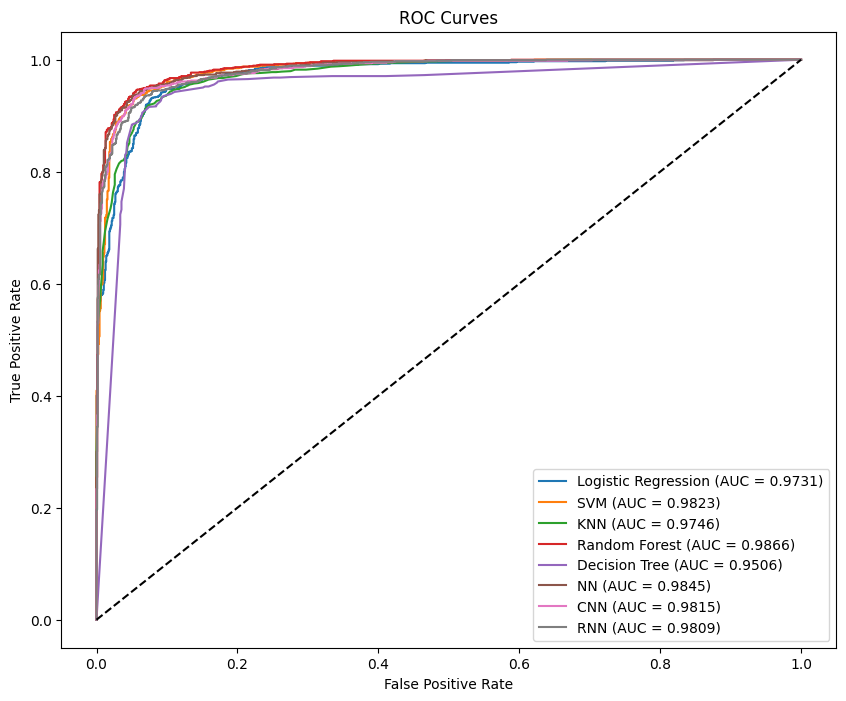

In [38]:

# ------------------- Plot ROC Curves -------------------
plt.figure(figsize=(10, 8))  # Set figure size
# Compute ROC curve for each model
# false positive rate, true positive rate = roc_curve(test,pred)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_prob_cnn)
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_prob_rnn)


# Plot ROC curves with respective AUC values in the legend
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.4f})'.format(results["Logistic Regression"]["AUC"]))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.4f})'.format(results["SVM"]["AUC"]))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.4f})'.format(results["KNN"]["AUC"]))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.4f})'.format(results["Random Forest"]["AUC"]))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.4f})'.format(results["Decision Tree"]["AUC"]))
plt.plot(fpr_nn, tpr_nn, label='NN (AUC = {:.4f})'.format(results["NN"]["AUC"]))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (AUC = {:.4f})'.format(results["CNN"]["AUC"]))
plt.plot(fpr_rnn, tpr_rnn, label='RNN (AUC = {:.4f})'.format(results["RNN"]["AUC"]))

# Add diagonal line representing random classifier
plt.plot([0, 1], [0, 1], 'k--')  

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# Display the legend in the lower right corner
plt.legend(loc='lower right')

# Show the plot
plt.show()

## Precision Recall Curve

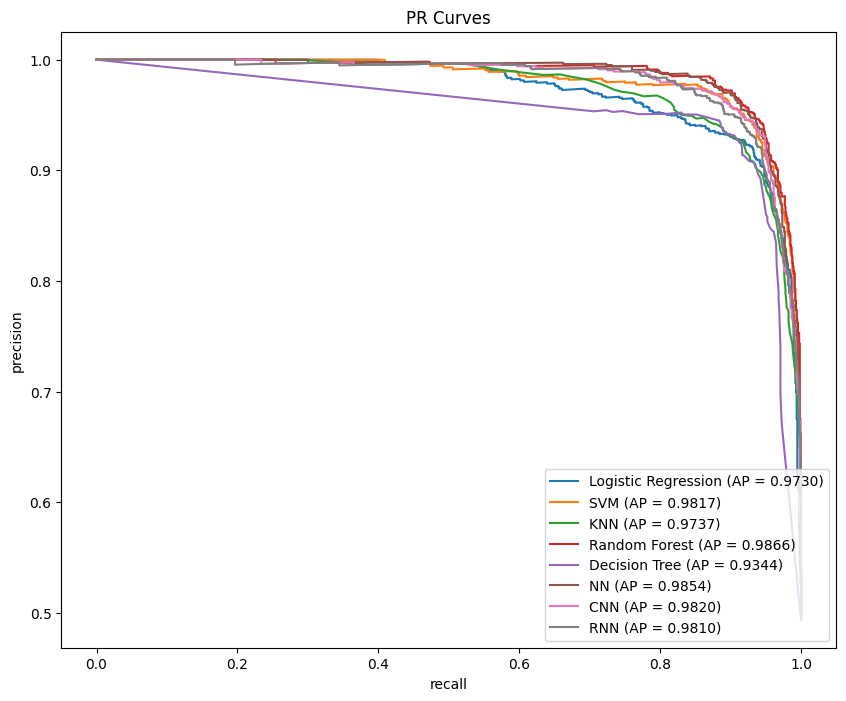

In [39]:

# ------------------- Plot ROC Curves -------------------
plt.figure(figsize=(10, 8))  # Set figure size
# Compute precision recall curve for each model
# precision, recall = precision_recall_curve(test,pred)
pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_prob_lr)
pre_svm, rec_svm, _ = precision_recall_curve(y_test, y_prob_svm)
pre_knn, rec_knn, _ = precision_recall_curve(y_test, y_prob_knn)
pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
pre_dt, rec_dt, _ = precision_recall_curve(y_test, y_prob_dt)
pre_nn, rec_nn, _ = precision_recall_curve(y_test, y_prob_nn)
pre_cnn, rec_cnn, _ = precision_recall_curve(y_test, y_prob_cnn)
pre_rnn, rec_rnn, _ = precision_recall_curve(y_test, y_prob_rnn)


# Plot PR curves with respective AP values in the legend
plt.plot(rec_lr, pre_lr, label='Logistic Regression (AP = {:.4f})'.format(results["Logistic Regression"]["AP"]))
plt.plot(rec_svm, pre_svm, label='SVM (AP = {:.4f})'.format(results["SVM"]["AP"]))
plt.plot(rec_knn, pre_knn, label='KNN (AP = {:.4f})'.format(results["KNN"]["AP"]))
plt.plot(rec_rf, pre_rf, label='Random Forest (AP = {:.4f})'.format(results["Random Forest"]["AP"]))
plt.plot(rec_dt, pre_dt, label='Decision Tree (AP = {:.4f})'.format(results["Decision Tree"]["AP"]))
plt.plot(rec_nn, pre_nn, label='NN (AP = {:.4f})'.format(results["NN"]["AP"]))
plt.plot(rec_cnn, pre_cnn, label='CNN (AP = {:.4f})'.format(results["CNN"]["AP"]))
plt.plot(rec_rnn, pre_rnn, label='RNN (AP = {:.4f})'.format(results["RNN"]["AP"]))

# Set axis labels and title
plt.ylabel('precision')
plt.xlabel('recall')
plt.title('PR Curves')

# Display the legend in the lower right corner
plt.legend(loc='lower right')

# Show the plot
plt.show()

## Confusion Matrix

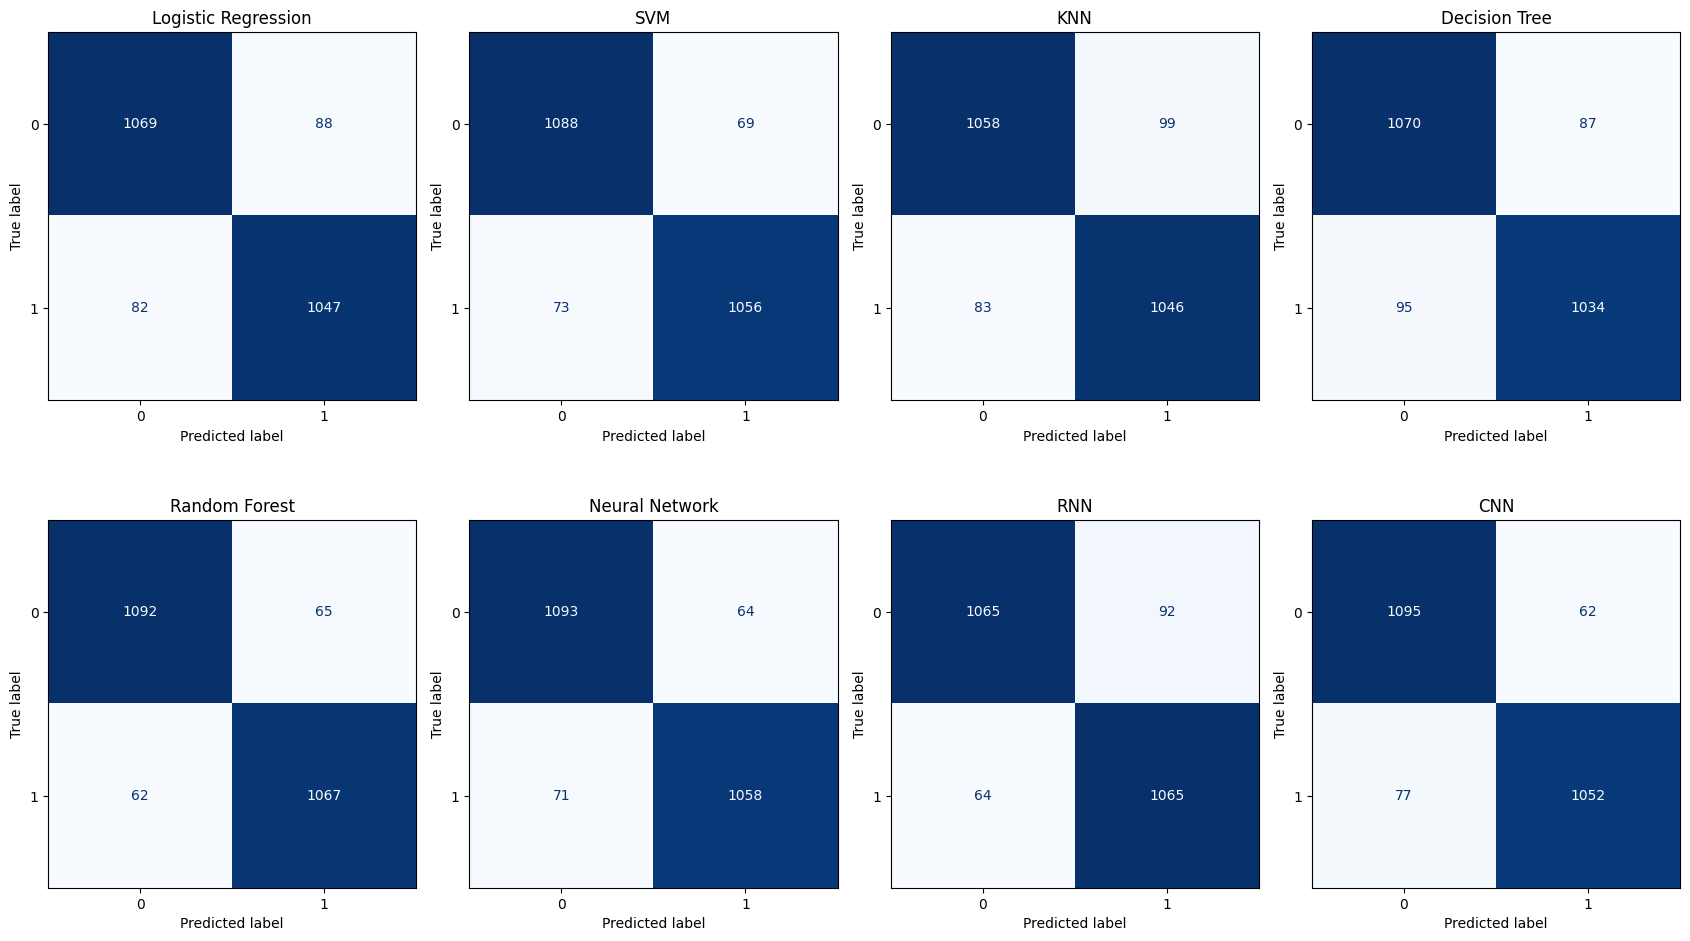

In [40]:
fig, axes = plt.subplots(2, 4, figsize=(17, 10))  # Adjust the grid as needed

Confusion_matrix_models = {
    "Logistic Regression" : y_pred_lr,
    "SVM" : y_pred_svm,
    "KNN" : y_pred_knn,
    "Decision Tree" : y_pred_dt,
    "Random Forest" : y_pred_rf,
    "Neural Network" : y_pred_nn_binary,
    "RNN" : y_pred_rnn_binary,
    "CNN" : y_pred_cnn_binary
}

axes = axes.flatten()

for ax, (model_name, y_pred) in zip(axes, Confusion_matrix_models.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot(ax=ax, colorbar=False, cmap=plt.cm.Blues)  # Avoid repeating colorbars for each subplot
    ax.set_title(model_name)


plt.tight_layout()
plt.show()

#   true negative         fasle positive
#   fasle negative        true positive